In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
pd.options.display.float_format = '{:,.0f}'.format

In [2]:
df = pd.read_csv('SalaryTravelExportDataAllYears.csv', encoding='latin')

In [3]:
df.columns

Index(['NAME', 'TITLE', 'SALARY', 'TRAVEL', 'ORGANIZATION', 'FISCAL_YEAR'], dtype='object')

In [4]:
len(df.ORGANIZATION.unique())

445

In [5]:
boe = []
for x in df.ORGANIZATION.unique():
    if 'BOARD OF EDUCATION' in x:
        boe.append(x)

In [6]:
len(boe)

176

In [7]:
college = []
for x in df.ORGANIZATION.unique():
    if 'COLLEGE' in x:
        college.append(x)
    if 'UNIVERSITY' in x:
        college.append(x)

In [8]:
len(college)

89

In [9]:
nonedu = []
for x in df.ORGANIZATION.unique():
    if 'BOARD OF EDUCATION' not in x and 'COLLEGE' not in x and 'UNIVERSITY' not in x and 'SCHOOL' not in x: 
        if 'ACADEMY' not in x and 'R.E.S.A.' not in x and 'EDUCATION' not in x and 'TEACHERS' not in x:
            if 'CHARTER' not in x and 'KIPP' not in x and 'STUDENT' not in x and 'INSTITUTE' not in x:
                nonedu.append(x)

In [10]:
len(nonedu)

114

In [11]:
# Populating list of agricultural organizations
ag_orgs = []
for x in df.ORGANIZATION.unique():
    if 'AGRI' in x:
        if 'COLLEGE' not in x:
            ag_orgs.append(x)

In [12]:
display(ag_orgs)

['AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA',
 'AGRICULTURAL COMMODITY COMMISSION FOR COTTON',
 'AGRICULTURAL COMMODITY COMMISSION FOR EGGS',
 'AGRICULTURAL COMMODITY COMMISSION FOR MILK',
 'AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO',
 'AGRICULTURE, DEPARTMENT OF',
 'AGRICULTURAL COMMODITY COMMISSION FOR EQUINES',
 'AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS',
 'AGRIRAMA DEVELOPMENT AUTHORITY, GEORGIA',
 'AGRICULTURAL COMMODITY COMMISSION FOR PECANS',
 'AGRICULTURAL COMMODITY COMMISSION FOR CORN']

In [13]:
# Creating new dataframe with only agriculture-related salaries and travel
ag = df[df['ORGANIZATION'].isin(ag_orgs)]

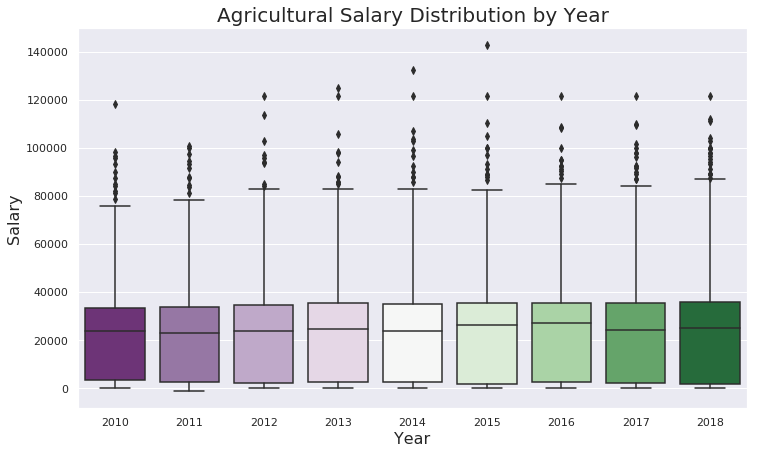

In [14]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='FISCAL_YEAR', y='SALARY', data=ag, palette='PRGn')
plt.title('Agricultural Salary Distribution by Year', size=20)
plt.xlabel('Year', size=16)
plt.ylabel('Salary', size=16)
plt.show()

In [15]:
pd.options.display.float_format = '{:,.0f}'.format  #Changing number formatting for easier reading

#Creating new dataframes with only 2018 salries and travel
ag2018 = ag[ag['FISCAL_YEAR'] == 2018]
ag2018 = ag2018.drop('FISCAL_YEAR', axis=1)
ag2018_totals = ag2018.groupby(['ORGANIZATION']).sum().reset_index()
ag2018_totals['total'] = ag2018_totals.SALARY + ag2018_totals.TRAVEL

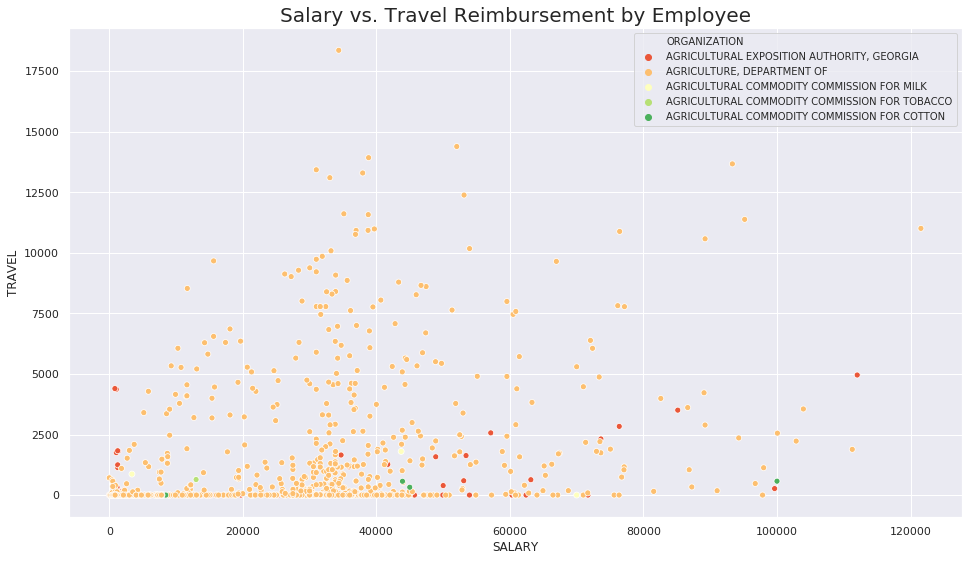

In [16]:
plt.figure(figsize=(16, 9))
sns.set_style("darkgrid")
sns.scatterplot(x='SALARY', y='TRAVEL', hue='ORGANIZATION', data=ag2018, palette='RdYlGn')
plt.title('Salary vs. Travel Reimbursement by Employee', size=20)
plt.legend(fontsize='medium')
plt.show()

In [17]:
ag2018.corr()

,SALARY,TRAVEL
SALARY,1,0
TRAVEL,0,1


The correlation coefficient (r = 0.356) shows some correlation between the two variables.  The graph above shows an interesting pattern in the relationship between salary and travel reimbursement.

In [18]:
ag2018.describe()

,SALARY,TRAVEL
count,"1,089","1,089"
mean,"23,888","1,178"
std,"22,211","2,496"
min,0,0
25%,"1,881",0
50%,"25,124",0
75%,"35,986","1,045"
max,"121,557","18,366"


## Interesting Statistics

Two facts stick out here:

1. Most employees received no travel reimbursement.

2. A quarter of employees received \$1,881 or less in salary.

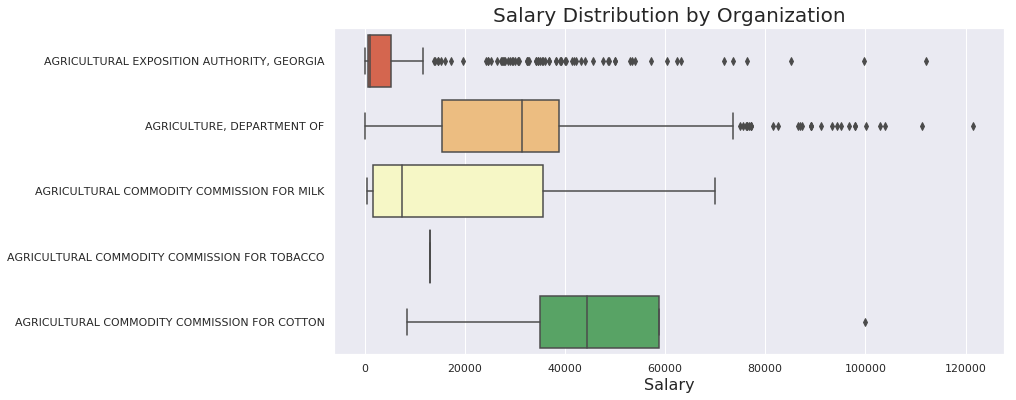

In [19]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='SALARY', y='ORGANIZATION', data=ag2018, palette='RdYlGn')
plt.title('Salary Distribution by Organization', size=20)
plt.xlabel('Salary', size=16)
plt.ylabel('', size=1)
plt.show()

The salary distributions are rather interesting, with many values that are considered outliers.

In [20]:
display(ag2018_totals)

,ORGANIZATION,SALARY,TRAVEL,total
0,AGRICULTURAL COMMODITY COMMISSION FOR COTTON,"197,372","1,466","198,839"
1,AGRICULTURAL COMMODITY COMMISSION FOR MILK,"130,245","2,668","132,914"
2,AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO,"13,000",642,"13,642"
3,"AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA","3,242,607","44,330","3,286,937"
4,"AGRICULTURE, DEPARTMENT OF","22,430,538","1,233,554","23,664,092"


In [21]:
salaries = ag.groupby(['ORGANIZATION', 'FISCAL_YEAR']).sum().reset_index()
salaries = salaries.pivot(index='ORGANIZATION', columns='FISCAL_YEAR', values='SALARY')
salaries = salaries.fillna(0)

In [22]:
display(salaries)

FISCAL_YEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORGANIZATION,,,,,,,,,
AGRICULTURAL COMMODITY COMMISSION FOR CORN,0,0,0,0,0,0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR COTTON,"144,758","144,600","150,153","158,772","162,134","195,308",0,"210,008","197,372"
AGRICULTURAL COMMODITY COMMISSION FOR EGGS,"101,817","102,330","103,894","99,774","96,092",0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR EQUINES,0,0,0,0,0,0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR MILK,"87,978","91,902","97,537","95,552","98,781","108,588",0,"117,145","130,245"
AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS,"482,487","497,758","470,402","460,168","503,030","457,371",0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR PECANS,0,0,0,0,0,"5,835",0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO,"13,800","13,462","13,850","13,200","13,600","13,200",0,"13,050","13,000"
"AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA","2,552,208","2,558,058","2,685,570","2,666,990","2,747,984","2,891,324","2,936,387","3,062,412","3,242,607"


In [23]:
salaries = salaries.drop(['AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO',
 'AGRICULTURE, DEPARTMENT OF',
 'AGRICULTURAL COMMODITY COMMISSION FOR EQUINES',
 'AGRIRAMA DEVELOPMENT AUTHORITY, GEORGIA',
 'AGRICULTURAL COMMODITY COMMISSION FOR PECANS',
 'AGRICULTURAL COMMODITY COMMISSION FOR CORN'])

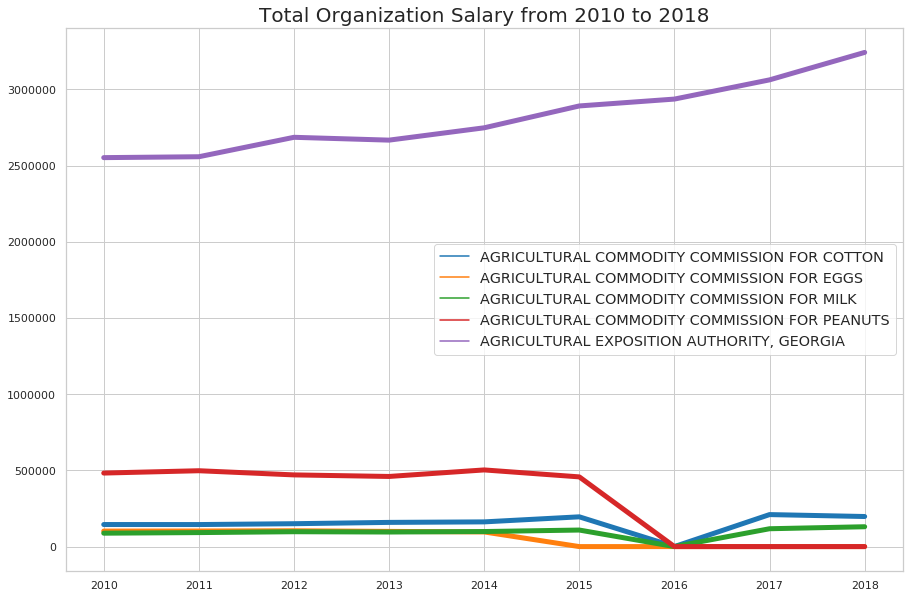

In [24]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
dates = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
values = salaries.values.T
data = pd.DataFrame(values, dates, columns=[
 'AGRICULTURAL COMMODITY COMMISSION FOR COTTON',
 'AGRICULTURAL COMMODITY COMMISSION FOR EGGS',
 'AGRICULTURAL COMMODITY COMMISSION FOR MILK',
 'AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS',
 'AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA'])
sns.lineplot(data=data, palette='tab10', linewidth=5, dashes=False)
plt.title('Total Organization Salary from 2010 to 2018', size=20)
plt.legend(fontsize='large')
plt.show()

Salary for the Georgia Agricultural Exposition Authority has been trending up.  No salaries were reported for 2016 by the various Agricultural Commodity Commissions.  The Commissions for Milk and Cotton have since reported salaries above 2015 levels, while The Commissions for Eggs and Peanuts have not reported any salaries post-2016.

In [25]:
travel = ag.groupby(['ORGANIZATION', 'FISCAL_YEAR']).sum().reset_index()
travel = travel.pivot(index='ORGANIZATION', columns='FISCAL_YEAR', values='TRAVEL')
travel = travel.fillna(0)

In [26]:
display(travel)

FISCAL_YEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORGANIZATION,,,,,,,,,
AGRICULTURAL COMMODITY COMMISSION FOR CORN,0,"2,979",0,0,0,"14,463",0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR COTTON,"15,184","16,015","12,039","13,070","16,389","26,010",0,"1,233","1,466"
AGRICULTURAL COMMODITY COMMISSION FOR EGGS,548,"6,102","6,193","7,490","5,696",0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR EQUINES,0,0,0,377,0,0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR MILK,"9,792","9,423","12,172","11,572","11,664","14,658",0,"3,195","2,668"
AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS,"112,856","118,500","103,966","94,393","111,150","100,381",0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR PECANS,354,979,"1,513",0,0,"2,148",0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO,"1,359","1,060","1,222",816,"1,238",995,0,"1,811",642
"AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA","9,721","32,758","21,401","22,828","15,388","16,949","38,094","35,138","44,330"


In [27]:
travel = travel.drop(['AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO',
 'AGRICULTURE, DEPARTMENT OF',
 'AGRICULTURAL COMMODITY COMMISSION FOR EQUINES',
 'AGRIRAMA DEVELOPMENT AUTHORITY, GEORGIA',
 'AGRICULTURAL COMMODITY COMMISSION FOR PECANS',
 'AGRICULTURAL COMMODITY COMMISSION FOR CORN'])

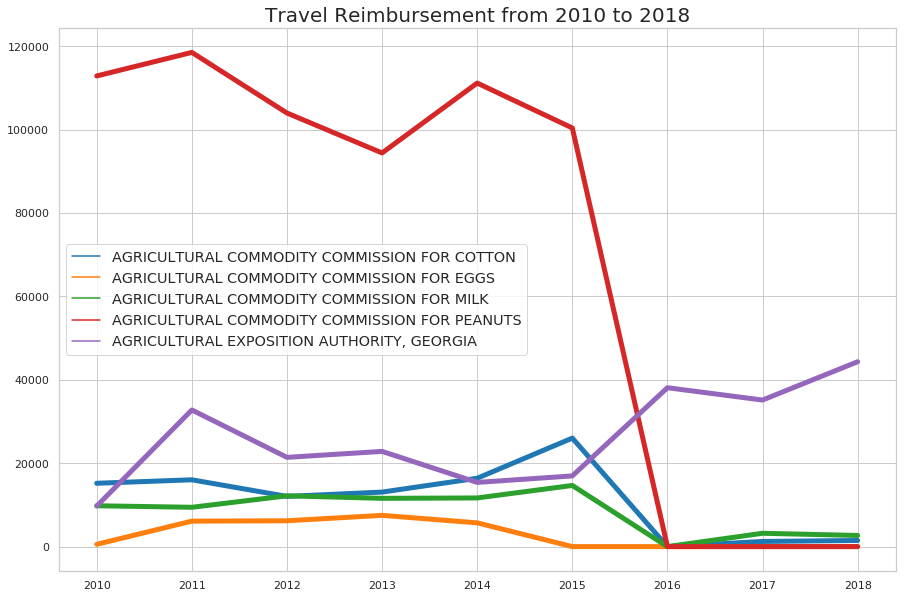

In [28]:
plt.figure(figsize=(15,10))
sns.set(style="whitegrid")
dates = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]
values = travel.values.T
data = pd.DataFrame(values, dates, columns=[
 'AGRICULTURAL COMMODITY COMMISSION FOR COTTON',
 'AGRICULTURAL COMMODITY COMMISSION FOR EGGS',
 'AGRICULTURAL COMMODITY COMMISSION FOR MILK',
 'AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS',
 'AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA'])
sns.lineplot(data=data, palette="tab10", linewidth=5, dashes=False)
plt.title('Travel Reimbursement from 2010 to 2018', size=20)
plt.legend(fontsize='large')

plt.show()

Travel reimbursement data shows similar trends to the salary data.

In [29]:
employee_count = ag.groupby(['ORGANIZATION', 'FISCAL_YEAR']).count().reset_index()
employee_count = employee_count.pivot(index='ORGANIZATION', columns='FISCAL_YEAR', values='SALARY')
employee_count = employee_count.fillna(0)
employee_count = employee_count.astype(int)

In [30]:
display(employee_count)

FISCAL_YEAR,2010,2011,2012,2013,2014,2015,2016,2017,2018
ORGANIZATION,,,,,,,,,
AGRICULTURAL COMMODITY COMMISSION FOR CORN,0,2,0,0,0,5,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR COTTON,8,8,8,9,10,17,0,3,4
AGRICULTURAL COMMODITY COMMISSION FOR EGGS,6,5,6,5,4,0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR EQUINES,0,0,0,1,0,0,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR MILK,8,11,11,11,7,9,0,3,6
AGRICULTURAL COMMODITY COMMISSION FOR PEANUTS,26,26,27,30,26,25,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR PECANS,2,2,2,0,0,1,0,0,0
AGRICULTURAL COMMODITY COMMISSION FOR TOBACCO,5,5,6,3,4,6,0,1,1
"AGRICULTURAL EXPOSITION AUTHORITY, GEORGIA",295,289,277,275,276,292,307,335,349


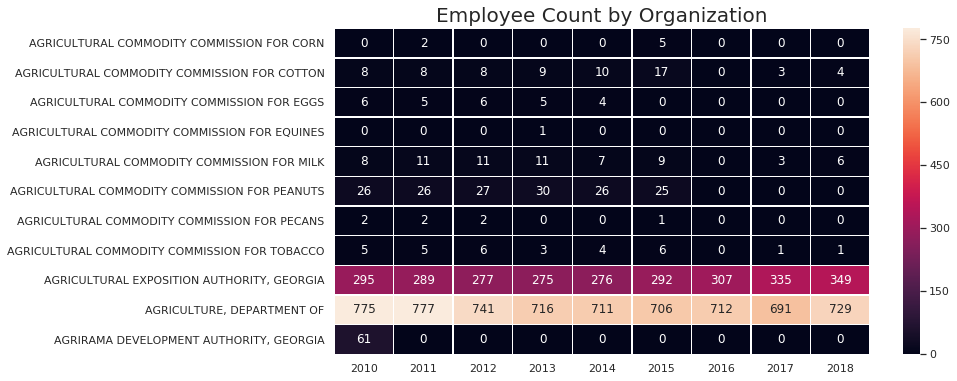

In [31]:
# Load the example flights dataset and conver to long-form
#flights_long = sns.load_dataset("flights")
#flights = flights_long.pivot("month", "year", "passengers")

# Draw a heatmap with the numeric values in each cell
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(employee_count, annot=True, fmt='d', linewidths=.5, ax=ax)
plt.title('Employee Count by Organization', size=20)
plt.xlabel('', size=1)
plt.ylabel('', size=1)
plt.show()

In [32]:
ag_spend = []
for i in df.FISCAL_YEAR.unique():
    agspend = df['SALARY'][(df['ORGANIZATION'].isin(ag_orgs)) & (df['FISCAL_YEAR'] == i)].sum()
    totalspend = df['SALARY'][df['FISCAL_YEAR'] == i].sum()
    percentage = agspend / totalspend * 100
    ag_spend.append([i, agspend, totalspend, percentage])
ag_spend = pd.DataFrame(ag_spend)
ag_spend.columns = ['year', 'agricultural', 'total', 'percentage']
ag_spend.year = ag_spend.year.astype(str)
ag_spend = ag_spend.set_index('year').sort_index()

In [33]:
class _IntArrayFormatter(pd.io.formats.format.GenericArrayFormatter):

    def _format_strings(self):
        formatter = self.formatter or (lambda x: ' {:,}'.format(x))
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values

pd.io.formats.format.IntArrayFormatter = _IntArrayFormatter

In [34]:
ag_spend.agricultural = ag_spend.agricultural.astype(int)
ag_spend.total = ag_spend.total.astype(int)
pd.options.display.float_format = '{:,.3f}'.format
ag_spend

,agricultural,total,percentage
year,,,
2010,"26,913,936","15,716,035,858",0.171
2011,"25,226,917","15,565,471,913",0.162
2012,"24,307,166","15,600,513,233",0.156
2013,"24,450,852","15,463,988,742",0.158
2014,"24,086,460","15,389,941,109",0.157
2015,"25,006,822","15,913,990,489",0.157
2016,"24,586,664","16,490,472,935",0.149
2017,"23,961,384","17,286,240,827",0.139
2018,"26,013,763","17,894,596,979",0.145


## Percentage of State Salaries Devoted to Agriculture-Related Positions
While agriculture is very important to the state of Georgia, a very small percentage of salaries go to those in agriculture-related positions (0.145% in 2018).